<html><h1><center style="color:blue">Internet of Things + Artificial intelligence:  Smart Phone Sensors based Human Activity Recognition using ML Algorithm</center></h1></html>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import itertools

from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Import Data sets

In [4]:
features_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\features.txt"

X_train_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\train\X_train.txt"

X_train_subject_path = r'C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\train\subject_train.txt'

y_train_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\train\y_train.txt"

X_test_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\test\X_test.txt"

X_test_subject_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\test\subject_test.txt"

y_test_path = r"C:\Users\Aryan Raj\Desktop\IOT+AI SRM - NITW-20220923T061626Z-001\IOT+AI _ SRM - NITW\Smart Human Activity Recognizer\UCI HAR Dataset\test\y_test.txt"


In [5]:
features = list()
with open(features_path) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [6]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

## Getting the  train data 

In [10]:
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [11]:

X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train.columns = [features]

X_train['subject'] = pd.read_csv(X_train_subject_path, header=None, squeeze=True)

y_train = pd.read_csv(y_train_path, names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3295,0.278489,-0.017046,-0.108813,-0.997420,-0.994042,-0.989765,-0.997401,-0.992820,-0.988753,-0.943668,...,-0.603245,0.105078,-0.031668,0.030784,-0.865289,0.039524,0.096869,17,4,SITTING
5029,0.319424,-0.057070,-0.034659,0.228304,0.248931,0.410613,0.134494,0.271334,0.312025,0.742717,...,-0.119609,-0.482176,-0.883638,-0.163836,-0.809924,0.162908,0.137412,23,3,WALKING_DOWNSTAIRS


In [12]:
train.shape

(7352, 564)

## Getting the  train data 

In [15]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv(X_test_subject_path, header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv(y_test_path, names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
953,0.279213,-0.018079,-0.106497,-0.995238,-0.982967,-0.980523,-0.995519,-0.984002,-0.980608,-0.938554,...,-0.186888,-0.088924,0.055217,-0.175459,-0.680726,-0.108238,-0.070466,10,4,SITTING
2777,0.270150,-0.031853,-0.136383,-0.994822,-0.985789,-0.980709,-0.995307,-0.985891,-0.984729,-0.939793,...,-0.023479,-0.155946,-0.111944,0.114424,-0.825642,0.187788,0.101844,24,5,STANDING


In [18]:
train.shape

(7352, 564)

# Data Cleaning

## Check for Duplicates

In [16]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## Checking for NaN/null values

In [17]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


# Data analysis

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, ('tBodyAcc-mean()-X',) to ('ActivityName',)
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, ('tBodyAcc-mean()-X',) to ('ActivityName',)
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB


In [22]:
from google.colab import data_table
from vega_datasets import data

data.enable_dataframe_formatter()

# data.airports()

ModuleNotFoundError: No module named 'vega_datasets'

In [ ]:
train.columns = train.columns.get_level_values(0)

columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

for i in test.columns:
  print(i)

tBodyAccmeanX
tBodyAccmeanY
tBodyAccmeanZ
tBodyAccstdX
tBodyAccstdY
tBodyAccstdZ
tBodyAccmadX
tBodyAccmadY
tBodyAccmadZ
tBodyAccmaxX
tBodyAccmaxY
tBodyAccmaxZ
tBodyAccminX
tBodyAccminY
tBodyAccminZ
tBodyAccsma
tBodyAccenergyX
tBodyAccenergyY
tBodyAccenergyZ
tBodyAcciqrX
tBodyAcciqrY
tBodyAcciqrZ
tBodyAccentropyX
tBodyAccentropyY
tBodyAccentropyZ
tBodyAccarCoeffX1
tBodyAccarCoeffX2
tBodyAccarCoeffX3
tBodyAccarCoeffX4
tBodyAccarCoeffY1
tBodyAccarCoeffY2
tBodyAccarCoeffY3
tBodyAccarCoeffY4
tBodyAccarCoeffZ1
tBodyAccarCoeffZ2
tBodyAccarCoeffZ3
tBodyAccarCoeffZ4
tBodyAcccorrelationXY
tBodyAcccorrelationXZ
tBodyAcccorrelationYZ
tGravityAccmeanX
tGravityAccmeanY
tGravityAccmeanZ
tGravityAccstdX
tGravityAccstdY
tGravityAccstdZ
tGravityAccmadX
tGravityAccmadY
tGravityAccmadZ
tGravityAccmaxX
tGravityAccmaxY
tGravityAccmaxZ
tGravityAccminX
tGravityAccminY
tGravityAccminZ
tGravityAccsma
tGravityAccenergyX
tGravityAccenergyY
tGravityAccenergyZ
tGravityAcciqrX
tGravityAcciqrY
tGravityAcciqrZ
tGravit

In [ ]:
train[train['ActivityName'] == 'STANDING'].describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,...,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.0
mean,0.279294,-0.016123,-0.107330,-0.985346,-0.936013,-0.942360,-0.987893,-0.937355,-0.940217,-0.922753,...,-0.658387,0.006748,0.010516,0.002024,0.012784,-0.773795,0.208318,0.041116,17.754003,5.0
std,0.020097,0.017846,0.035680,0.022872,0.081921,0.088458,0.019117,0.082661,0.095517,0.039487,...,0.291540,0.118181,0.252334,0.503631,0.547533,0.102962,0.069053,0.113552,8.755764,0.0
min,0.111231,-0.116007,-0.509645,-0.999699,-0.999873,-0.999454,-0.999867,-1.000000,-0.999755,-0.950454,...,-0.999765,-0.849814,-0.929563,-0.989874,-1.000000,-0.999380,0.010798,-0.233938,1.000000,5.0
25%,0.274952,-0.021767,-0.117434,-0.996851,-0.982725,-0.986223,-0.997235,-0.982212,-0.986114,-0.941664,...,-0.876233,-0.036766,-0.123103,-0.395706,-0.456831,-0.844129,0.168416,-0.038513,11.000000,5.0
50%,0.277507,-0.017097,-0.108771,-0.994172,-0.966772,-0.973648,-0.994892,-0.967172,-0.973041,-0.937057,...,-0.747718,0.005690,0.010917,-0.024148,0.017110,-0.791113,0.210106,0.020864,19.000000,5.0
75%,0.280299,-0.012766,-0.101063,-0.984475,-0.923940,-0.936458,-0.987254,-0.926848,-0.935736,-0.921891,...,-0.536504,0.050854,0.147555,0.401101,0.506168,-0.697755,0.255840,0.132479,26.000000,5.0
max,0.631510,0.212768,0.267377,-0.793113,-0.101380,0.297675,-0.782881,-0.049920,0.443498,-0.620883,...,0.776335,0.806740,0.891674,0.972221,0.996078,-0.450563,0.372796,0.369187,30.000000,5.0


## Exploratory Data Analysis

### All the feature name with lots of unnecessary singhs:  Changing feature names 

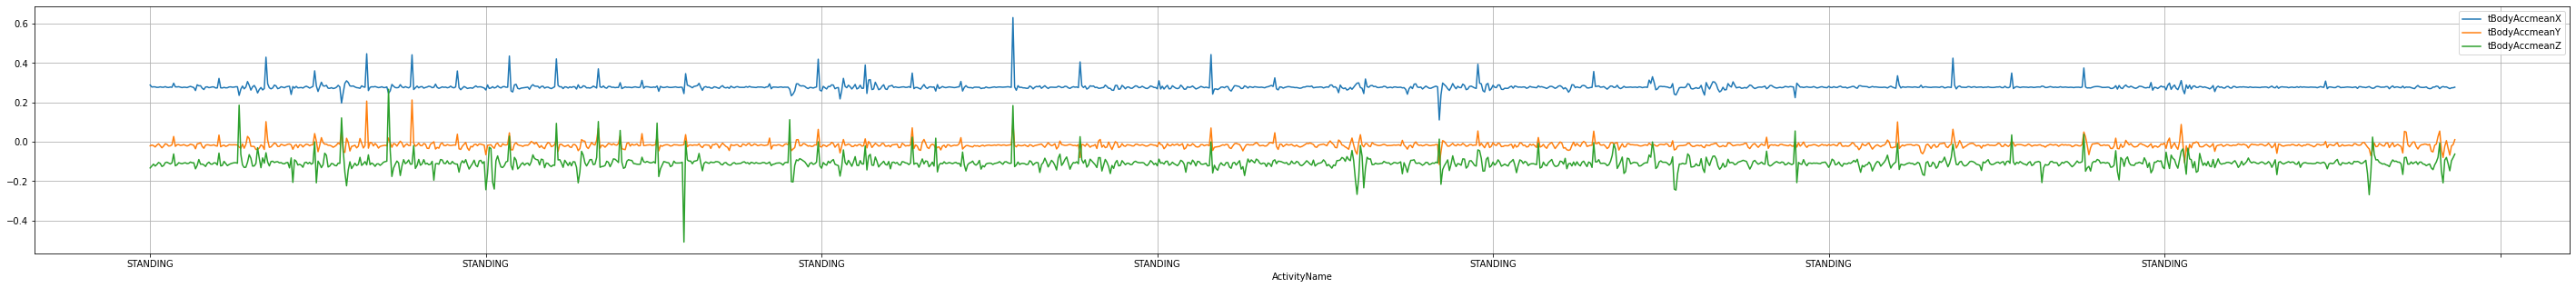

In [ ]:
train[train['ActivityName'] == 'STANDING'].plot(x='ActivityName', y=['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ'], figsize=(50,5), grid=True)

##participants activity durations.


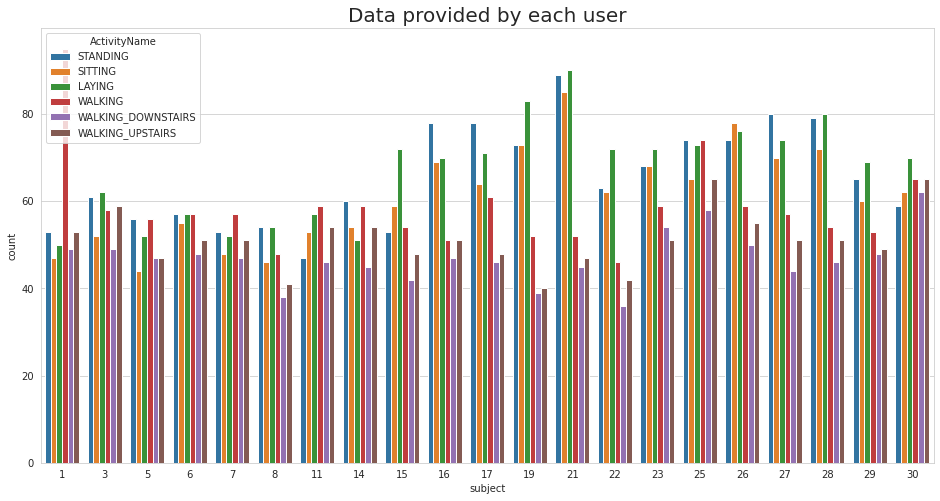

In [ ]:

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)

plt.show()



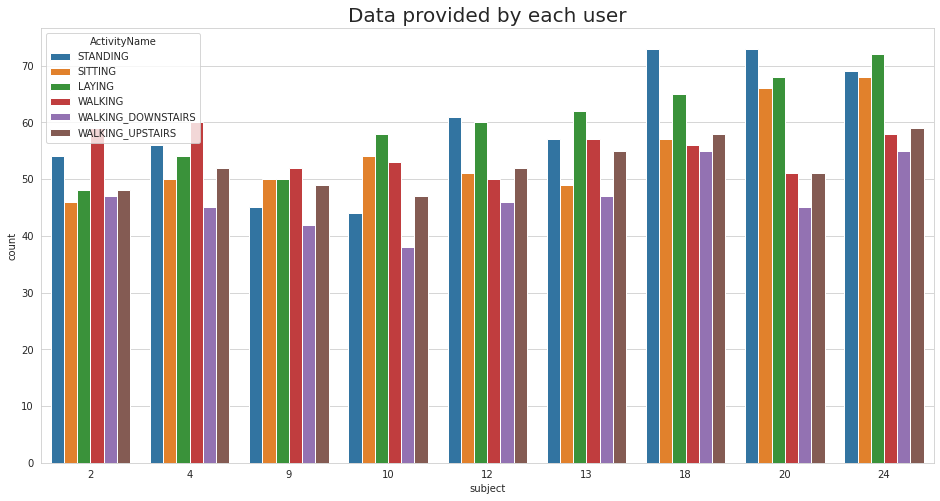

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = test)
plt.show()

## Distribution of ActivityName

In [ ]:
# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
iplot(fig)

#Featuring Engineering

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.



### 3. Stationary and Moving activities are completely different

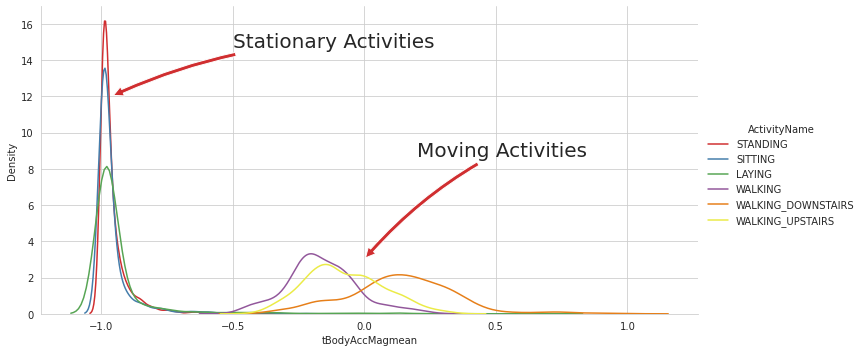

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

- As aspected from most real world data, when participants are moving the data is normally distributed with some long tail.

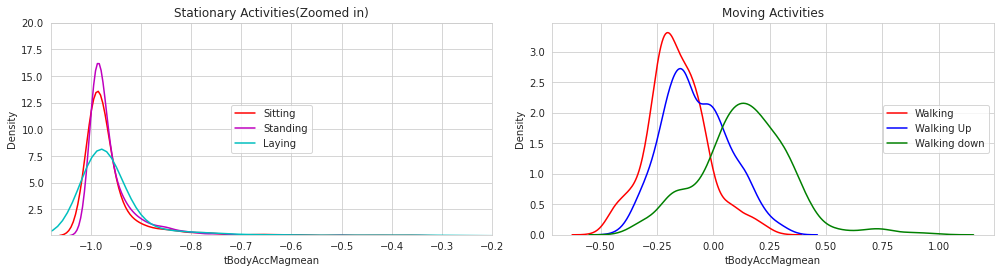

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

- We can see clearly here, the distribuation of Stationary Activities and Moving Activities.

### 4. Magnitude of an acceleration can saperate it well

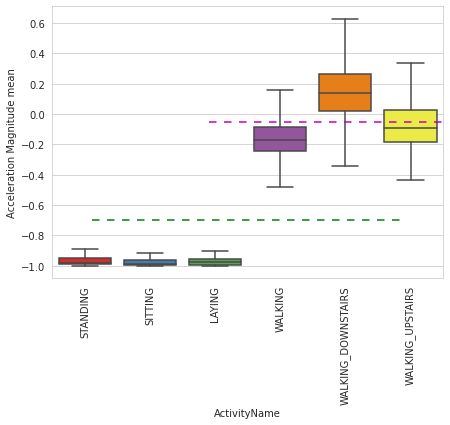

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 5. Position of GravityAccelerationComponants also matters 

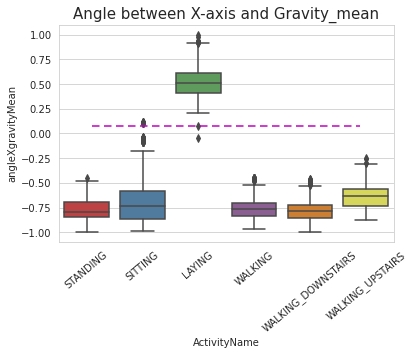

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

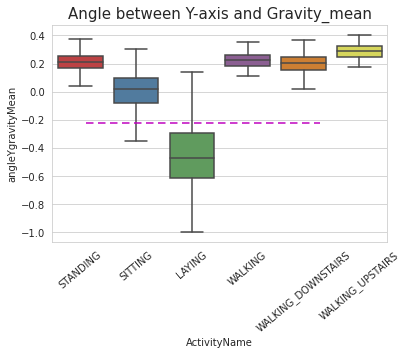

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Data Preprocessing

In [ ]:
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [ ]:
train.head(2)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [ ]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ML Models

In [ ]:

def build_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

#### Make function to print the gridsearch Parameters

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

    

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:01:47.230681

Predicting test data
Done....!

==> testing time:- 0:00:00.016394

==> Accuracy:- 0.9677638276213099


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  11 520   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


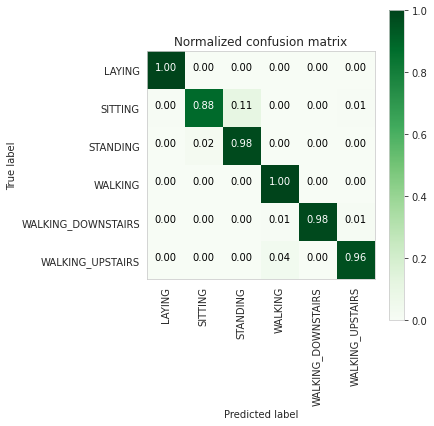

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



==> Best Estimator:
	LinearSVC(C=0.5, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 0.5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9415205538367623


In [ ]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = build_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(lr_svc_grid_results['model'])

In [ ]:
best_model = LinearSVC(C=1, tol=5e-05)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


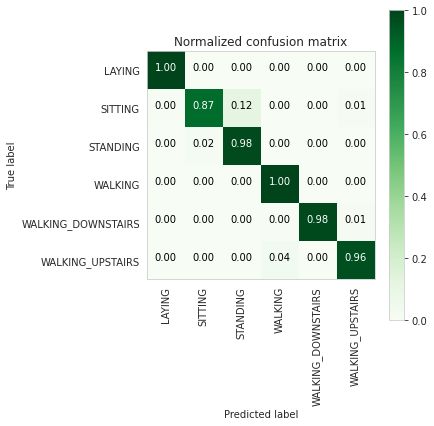

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_cmap=plt.cm.Greens
    
# plot confusin matrix
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
plt.show()

In [ ]:
y_test[100:105]

100    WALKING
101    WALKING
102    WALKING
103    WALKING
104    WALKING
Name: ActivityName, dtype: object

In [ ]:
X_test.iloc[100]

tBodyAccmeanX                        0.240421
tBodyAccmeanY                        0.001085
tBodyAccmeanZ                       -0.118881
tBodyAccstdX                        -0.433321
tBodyAccstdY                        -0.097815
                                       ...   
angletBodyGyroMeangravityMean       -0.802970
angletBodyGyroJerkMeangravityMean    0.479051
angleXgravityMean                   -0.670877
angleYgravityMean                    0.325196
angleZgravityMean                    0.005666
Name: 100, Length: 561, dtype: float64

In [ ]:
y_test[0]

'STANDING'